In [ ]:
words = open("names.txt").read().splitlines()
words[:10]
len(words)
min(len(w) for w in words)
max(len(w) for w in words)

b = {}
for w in words:
    # why use list instead of string?
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(w, w[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

sorted(b.items(), key=lambda x: -x[1])


In [13]:
import torch


In [81]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {c: i+1 for i, c in enumerate(chars)}
stoi['.'] = 0
itos = {i: c for c, i in stoi.items()}
len(itos)

27

In [53]:
#for biagram, c in b.items():
#    ch1 = stoi[biagram[0]]
#    ch2 = stoi[biagram[1]]
#    N[ch1][ch2] = c

for w in words:
    # why use list instead of string?
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1][idx2] += 1

sorted(b.items(), key=lambda x: -x[1])


[(('a', 'n'), 5438),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('a', 'l'), 2528),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('o', 'n'), 2411),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('a', 'y'), 2050),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('j', 'a'), 1473),
 (('n', 'e'), 1359),
 (('l', 'l'), 1345),
 (('i', 'l'), 1345),
 (('i', 's'), 1316),
 (('d', 'a'), 1303),
 (('s', 'h'), 1285),
 (('d', 'e'), 1283),
 (('e', 'e'), 1271),
 (('m', 'i'), 1256),
 (('s', 'a'), 1201),
 (('a', 's'), 1118),
 (('y', 'l'), 1104),
 (('e', 'y'), 1070),
 (('o', 'r'), 1059),
 (('a', 'd'), 1042),
 (('t', 'a'), 1027),
 (('v', 'i'), 911),
 (('k', 'e'), 

(-0.5, 26.5, 26.5, -0.5)

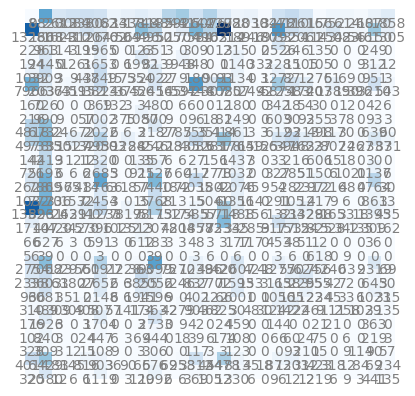

In [56]:
import matplotlib.pyplot as plt
%matplotlib  inline
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        #plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [61]:
N[0]
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [69]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [70]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)


tensor([ 9, 18,  2,  5,  3,  1, 13, 11, 11, 22, 11, 15, 26,  2, 18, 13, 10,  1,
        15,  2,  3, 15, 10, 12,  4,  9,  3,  4,  6,  4, 19, 10,  3,  8,  4, 10,
        13, 14, 13, 10, 19, 11,  8, 13,  5,  5,  6, 25, 20, 10, 18,  1,  8,  3,
         2, 20,  1,  1,  3, 10, 11, 25, 18,  1,  9, 11,  8, 12,  3, 12, 19,  9,
        18, 13,  4,  4, 13, 13,  8, 13,  1,  2,  4,  1,  6,  1,  1, 10, 14, 10,
        13, 12, 10,  1,  1, 20, 18, 20, 19,  1])

In [75]:
P = (N+1).float()
P = P/P.sum(1, keepdim=True)

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() 
        if itos[ix] == '.':
            break
        out.append(itos[ix])
    print(''.join(out))

cexze
momasurailezitynn
konimittain
llayn
ka


In [77]:
log_likelihood = 0.0
n = 0

for w in words:
    ws = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(ws, ws[1:]):
        prob = P[stoi[ch1]][stoi[ch2]]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-561702.4375)
nll=tensor(561702.4375)
2.4620306491851807


In [82]:
# create the training set of bigrams (x,y)
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for idx, idy in zip(chs, chs[1:]):
        print(idx, idy)
        xs.append(stoi[idx])
        ys.append(stoi[idy])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [85]:
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


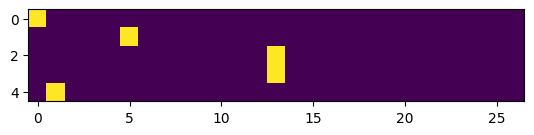

In [88]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc
xenc.shape
plt.imshow(xenc)

In [90]:
W = torch.randn((27,1))
logits = xenc@W # 为什么例子里已经是 (5, 27)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
prob

tensor(0.1684)